<a href="https://colab.research.google.com/github/yeesem2002/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/yeesem2002/Machine-Learning-Datasets/main/USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

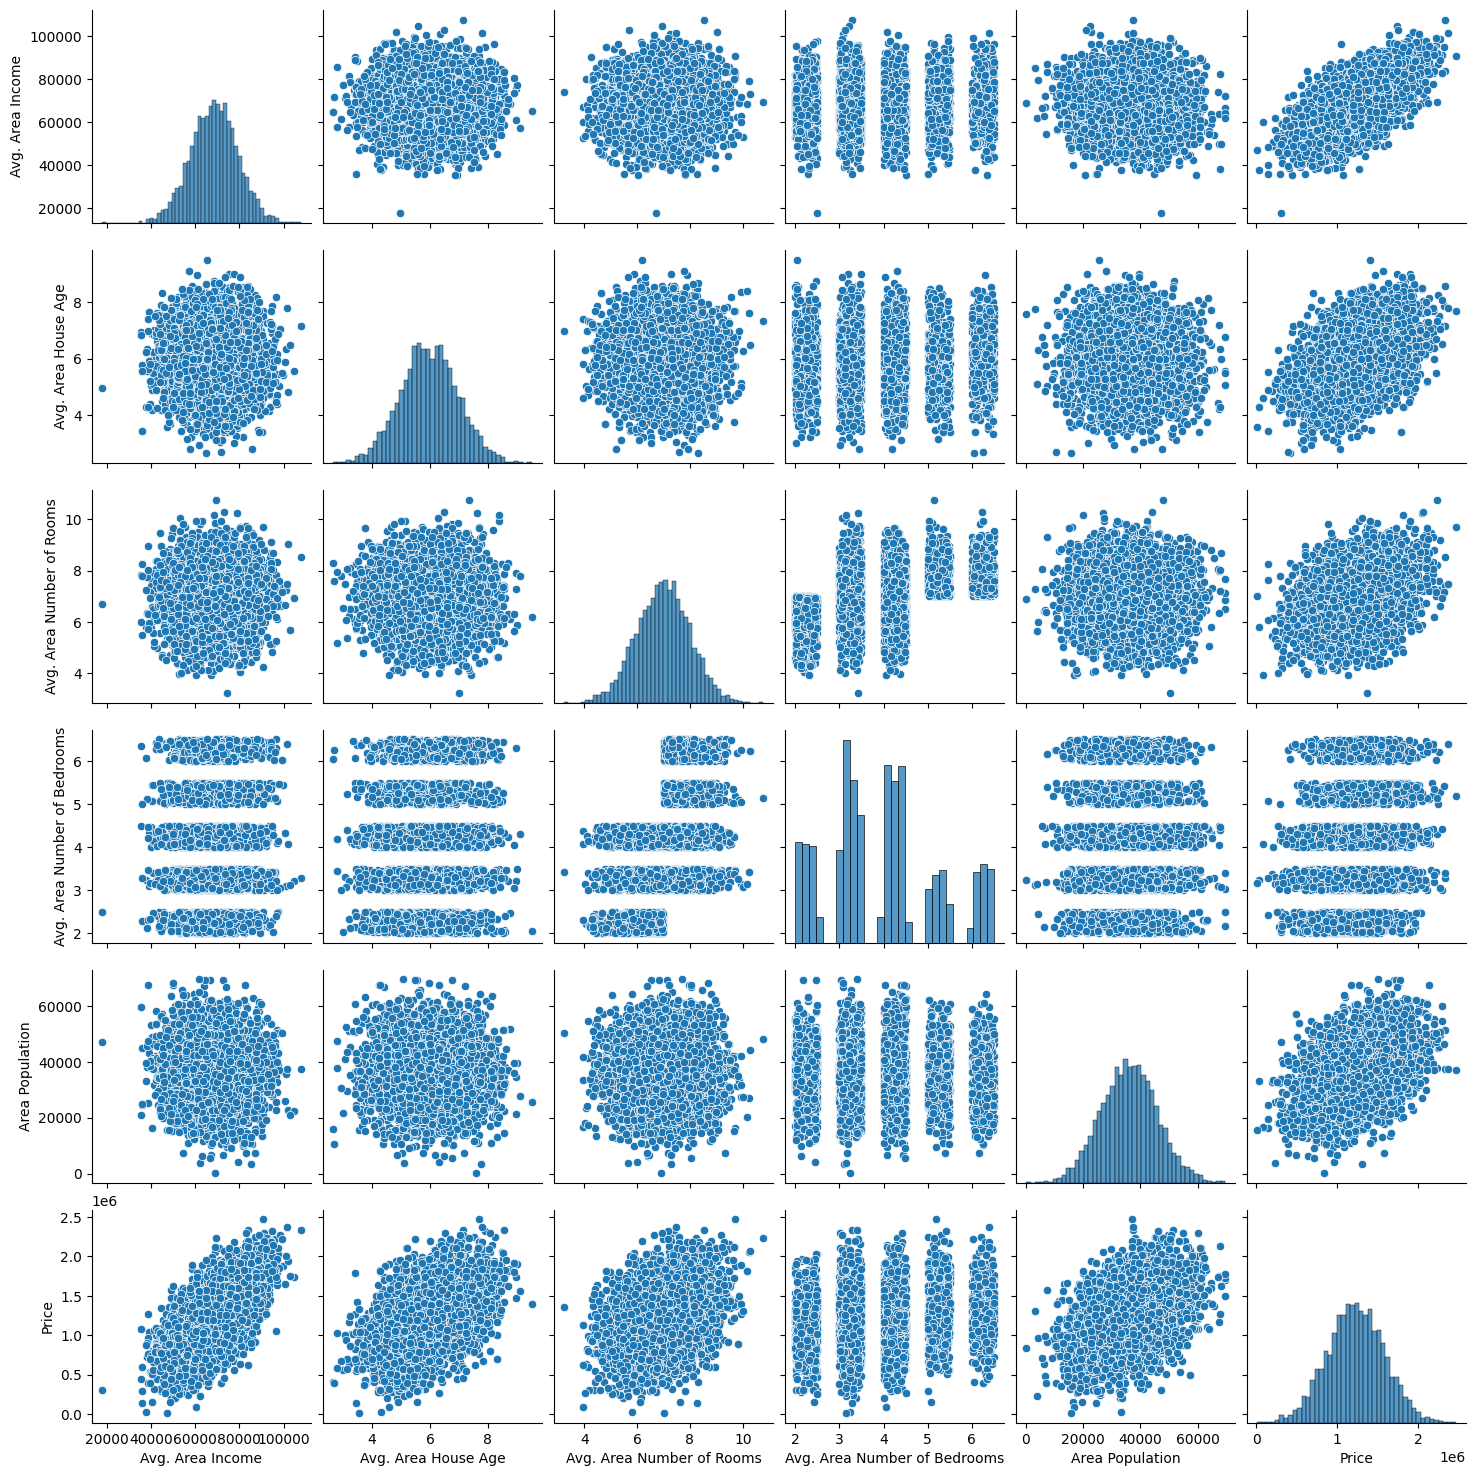

In [10]:
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Count'>

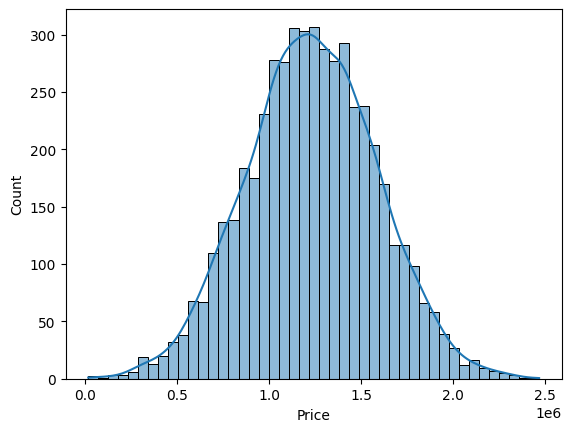

In [15]:
sns.histplot(df['Price'],kde=True)

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

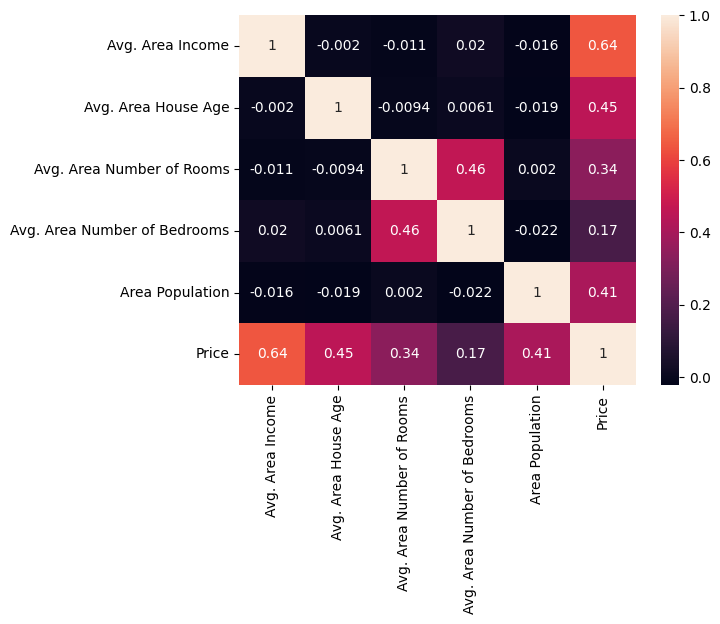

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [20]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [21]:
y = df['Price']

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
#test_size    - Percentage of allocation of dataset for training
#random_state - random split of data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
print(lm.intercept_)

-2640159.7968526953


In [31]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [33]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [35]:
#Avg.Area Income increases 1 unit, increase 21.52876 in price
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# **Predictions**

In [39]:
predictions = lm.predict(X_test)

In [40]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

In [42]:
#y_test contains the correct data
#predictions is the prediction data
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

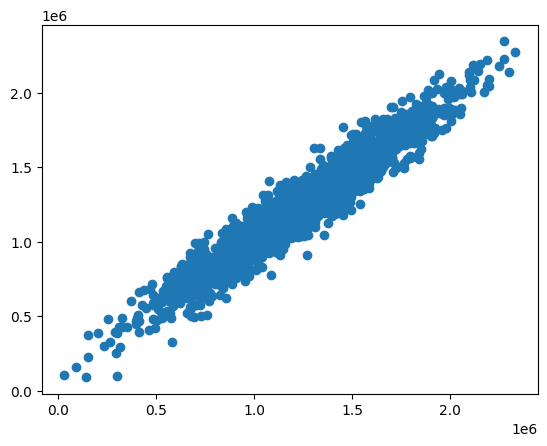

In [45]:
plt.scatter(y_test,predictions)

<Axes: xlabel='Price', ylabel='Count'>

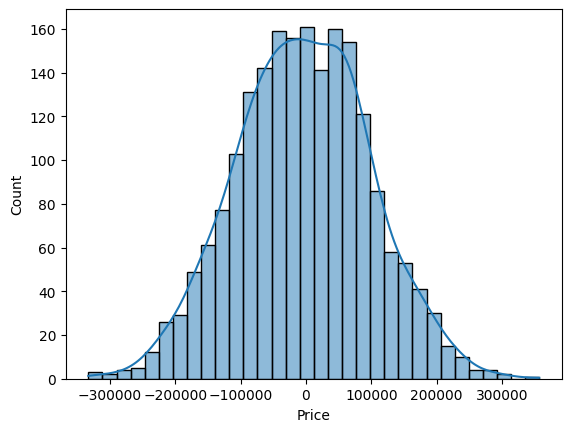

In [50]:
#Normally distributed - correct choice of the model
sns.histplot((y_test-predictions),kde=True)

In [51]:
#Regression Evaluation Metrics
#1. Mean Absolute Error
#2. Mean Squared Error
#3. Root Mean Squared Error
from sklearn import metrics

In [53]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914942

In [54]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208977

In [55]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290897

# **Exercise**

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/yeesem2002/Machine-Learning-Datasets/main/Ecommerce%20Customers')

In [57]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [59]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


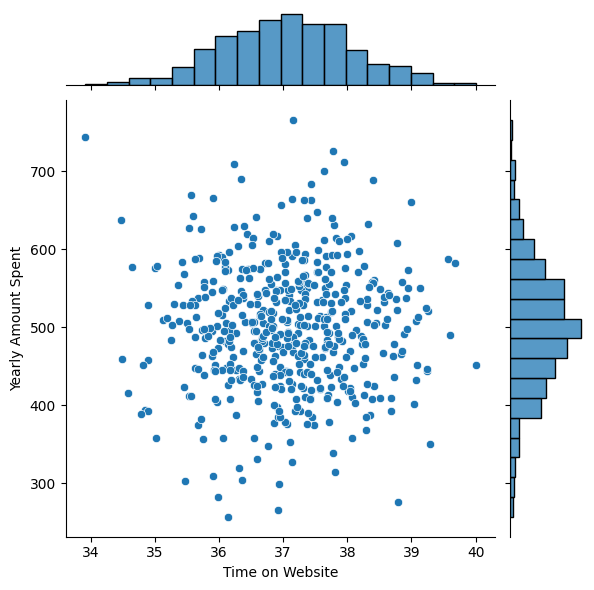

In [61]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

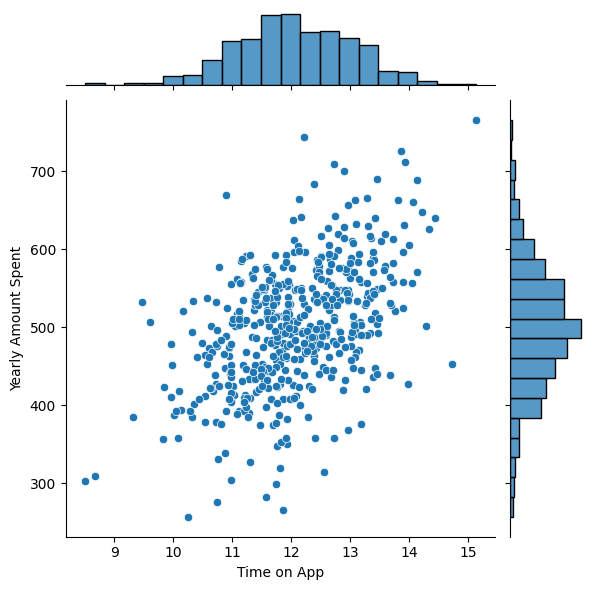

In [62]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

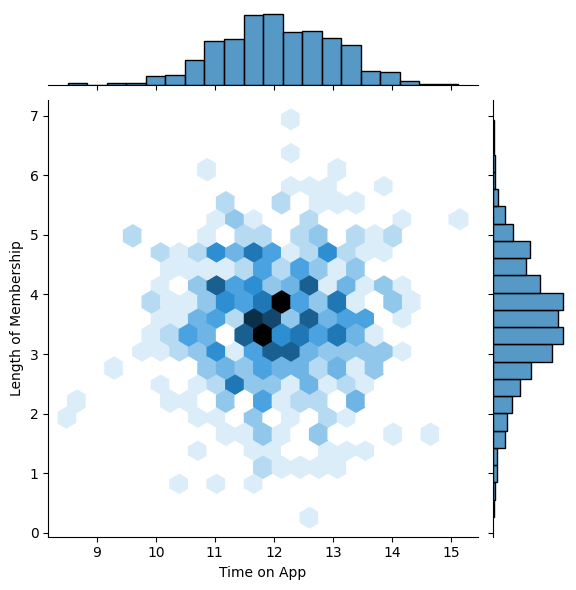

In [64]:
sns.jointplot(x='Time on App',y='Length of Membership',data = df,kind = 'hex')

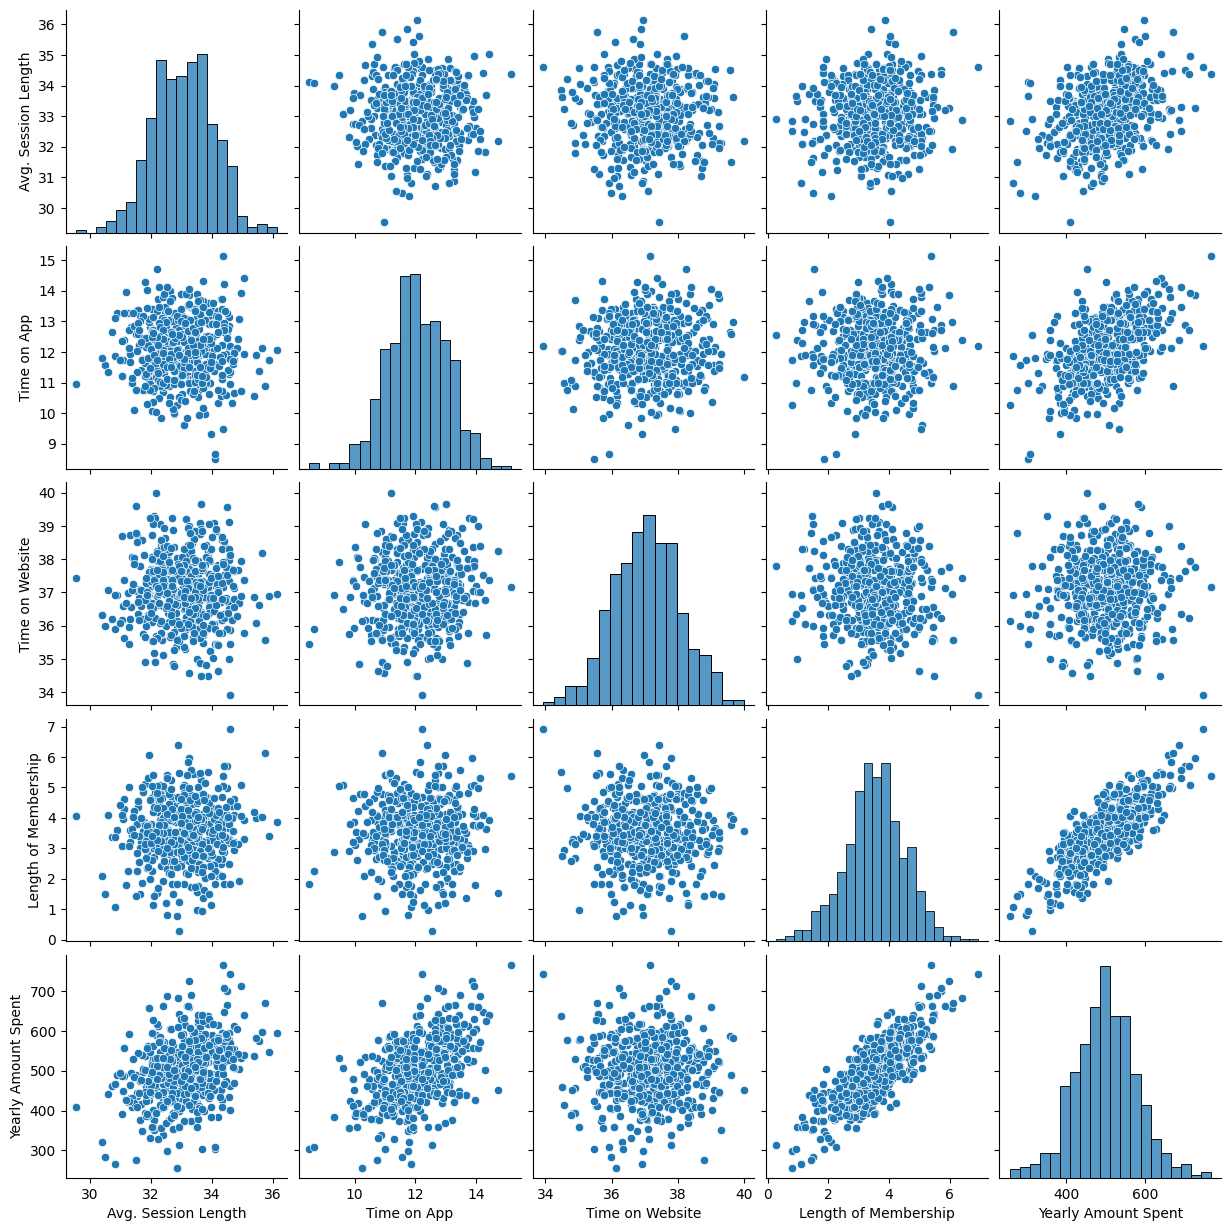

In [65]:
sns.pairplot(df)

#Based on this plot what looks to be the most correlated feature with
#Yearly Amount Spent
#Answer - Length of Membership

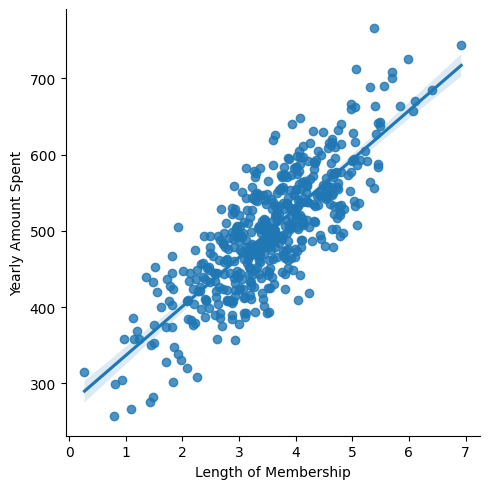

In [66]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data = df)

# **Training and Testing Data**

In [67]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [69]:
y = df['Yearly Amount Spent']

In [70]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [72]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# **Training the Model**

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lm = LinearRegression()

In [84]:
lm.fit(X_train,y_train)

LinearRegression()

In [86]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [87]:
lm.intercept_

-1047.9327822502391

In [99]:
data = {
    'Coef' : lm.coef_,
    'Intercept' : lm.intercept_
}
data

{'Coef': array([25.98154972, 38.59015875,  0.19040528, 61.27909654]),
 'Intercept': -1047.9327822502391}

In [110]:
para = pd.DataFrame(data,index = X.columns)
para

,Coef,Intercept
Avg. Session Length,25.981550,-1047.932782
Time on App,38.590159,-1047.932782
Time on Website,0.190405,-1047.932782
Length of Membership,61.279097,-1047.932782


# **Predicting the Test Data**

In [101]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Prediction Value')

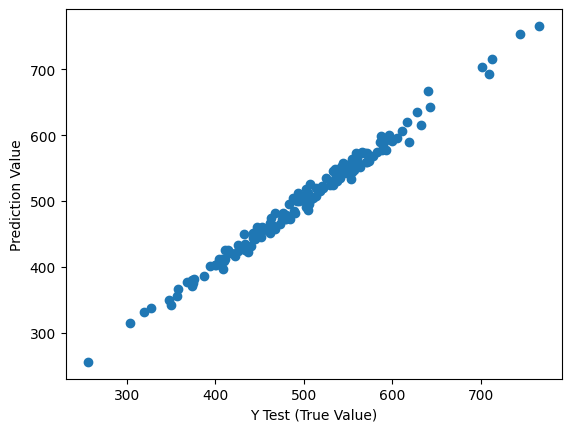

In [103]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test (True Value)')
plt.ylabel('Prediction Value')

# **Evaluating the Model**

In [104]:
from sklearn import metrics

In [106]:
print('MAE ',metrics.mean_absolute_error(y_test,prediction))
print('MSE ',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE  7.228148653430826
MSE  79.81305165097427
RMSE 8.933815066978624


In [107]:
metrics.explained_variance_score(y_test,prediction)

0.9890771231889606

# **Residuals**

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

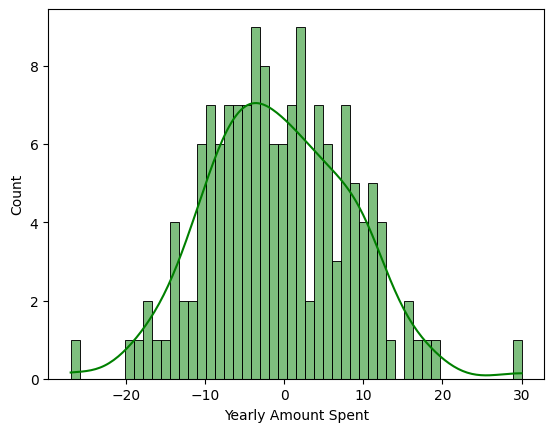

In [109]:
sns.histplot((y_test-prediction),kde = True,color = 'green',bins=50)